In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 확률모형
실행할 때마다 결과가 다르면 언뜻 다루기 어렵다고 생각할 수 있지만, 해당 사례는 넘처난다.
- 불확정성을 수반한 현상을 해석하기 위해 확률 사용
- 확률을 사용한 무작위추출을 모델링한 것 -> 확률모형

## 4.2.1 확률의 기본
- 확률변수: 취하는 값과 그 값이 나올 확률이 결정되어 있는 것
- 시행: 확률변수의 결과를 관측하는 것
- 실현값: 시행에 의해 관측되는 값
- 사건: "눈이 1"(근원사건: 세부적 분해 X), "눈이 홀수" 처럼 시행결과로 나타날 수 있는 일


"눈이 1"이 되는 사건
- P(X=1) =1/6

"사건이 서로 배반이라면, 그중에 적어도 하나 일어나는 사건은 각 사건의 확률의 합과 같음" -> ex): 주사위에서 홀수가 나올 확률
- 사건이 "상호배반" 이라는 것은 각 사건이 동시에는 일어날 수 앖다는 말

## 4.2.2 확률분포
- 확률분포: 확률변수가 어떻게 움직이는지를 나타낸 것

불공정한 주사위가 있다고 가정해보자.

In [1]:
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

In [4]:
np.random.choice(dice,p=prob)

6

랜덤추출을 100번 시행해보자


In [6]:
num_trial = 100
sample = np.random.choice(dice,num_trial,p=prob)
sample

array([6, 6, 3, 3, 3, 6, 5, 3, 5, 5, 4, 5, 5, 5, 1, 3, 6, 4, 3, 3, 6, 3,
       5, 2, 2, 4, 4, 6, 3, 4, 3, 4, 1, 2, 6, 3, 4, 4, 6, 6, 6, 3, 3, 5,
       5, 4, 5, 5, 5, 4, 4, 2, 5, 4, 5, 6, 3, 5, 6, 3, 4, 3, 5, 6, 6, 6,
       6, 5, 5, 1, 6, 3, 4, 2, 3, 6, 5, 4, 5, 6, 4, 2, 4, 4, 3, 1, 4, 5,
       4, 4, 5, 6, 6, 5, 5, 3, 5, 5, 6, 5])

해당 랜덤추출을 도수분포표 작성

In [9]:
freq, _ = np.histogram(sample,bins=6,range=(1,7))
pd.DataFrame({'frequency':freq,
             'relative frequency':freq / num_trial},
            index = pd.Index(np.arange(1,7),name='dice'))

,frequency,relative frequency
dice,,
1,4,0.04
2,6,0.06
3,20,0.20
4,21,0.21
5,27,0.27
6,22,0.22


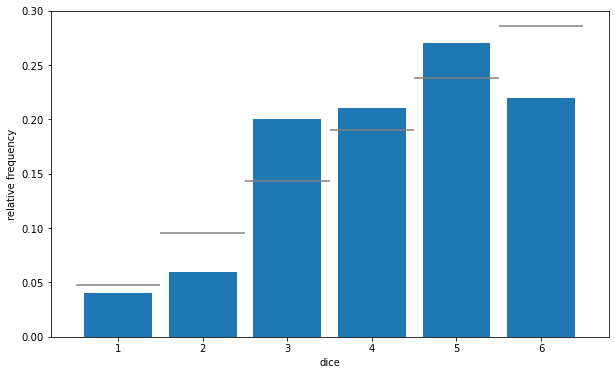

In [22]:
fig  = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins = 6, range = (1,7),density = True,rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax. hlines(prob, np.arange(1,7),np.arange(2,8), colors='gray')
#막대 그래프에 눈금 표시
ax.set_xticks(np.linspace(1.5,6.5,6))
#주사위 눈의 값은 [1,2,3,4,5,6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

100번 시행하여 얻은 상대도수부터의 확률분포와 실제 확률분포 사이에 상당한 차이가 있음. 10000번을 시행하고 다시한번 히스토그램을 살펴보자.

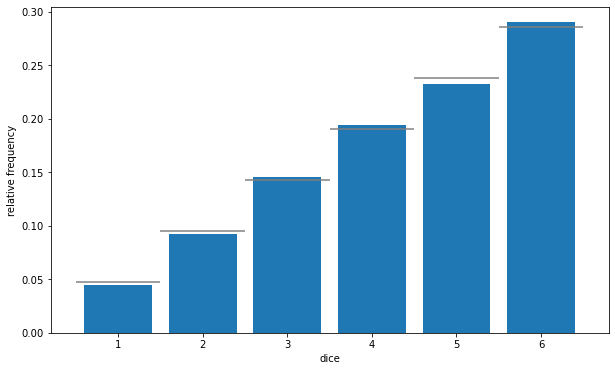

In [23]:
num_trial = 10000
sample = np.random.choice(dice,num_trial,p=prob)
sample

fig  = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins = 6, range = (1,7),density = True,rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax. hlines(prob, np.arange(1,7),np.arange(2,8), colors='gray')
#막대 그래프에 눈금 표시
ax.set_xticks(np.linspace(1.5,6.5,6))
#주사위 눈의 값은 [1,2,3,4,5,6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

상대도수(relative fequency) 가 실제의 확률분포에 가까워졌다.